In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['ggplot'])

# Reference
[Stanford CS229 Machine Learning: Linear Regression and Gradient Descent]("https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU")

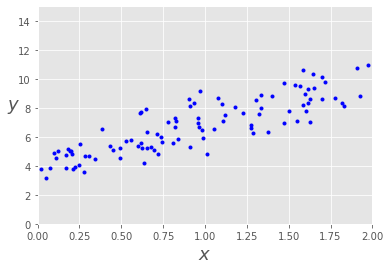

In [2]:
# Create Data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.xlabel("$x$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
_ = plt.axis([0, 2, 0, 15])

theta_best: [[3.96878768]
 [2.98311419]]
y_predict: [[3.96878768]
 [9.93501606]]


(0.0, 2.0, 0.0, 15.0)

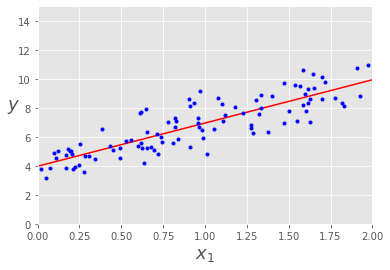

In [3]:
# Analytical way of Linear Regression
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("theta_best: {}".format(theta_best))

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print("y_predict: {}".format(y_predict))

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])

# Stochastic Gradient Descent
### In the process of Gradient Descent, we will update our parameters after go through all training set. However, it will cost much training time. Therefore, in the SGD, it only update the parameters after going through a mini-batch(update every n, where n << m or average the loss of the mini-batch and update)

In [4]:
# Loss function
def  cal_cost(theta, X, y):
    '''
    
    Calculates the cost for given X and Y. The following shows a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    # assert m == len(predictions)
    cost = (1/(2 * m)) * np.sum(np.square(predictions - y))   
    return cost

# SGC
def stocashtic_gradient_descent(X, y, theta, learning_rate = 0.01, iterations = 10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind,:].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1 / m) * learning_rate * ( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)

        cost_history[it]  = cost
        
    return theta, cost_history


Theta0:          3.890,
Theta1:          2.974
Final cost/MSE:  47.331


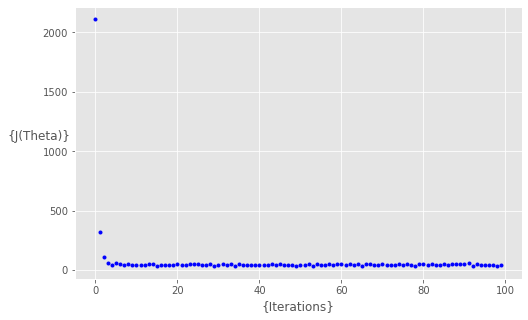

In [12]:
lr = 0.5
n_iter = 100
decay_r = 0.9

theta = np.random.randn(2, 1)

X_b = np.c_[np.ones((len(X), 1)), X]
theta,cost_history = stocashtic_gradient_descent(X_b, y, theta, lr, n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0], theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

fig,ax = plt.subplots(figsize = (8, 5))

ax.set_ylabel('{J(Theta)}', rotation = 0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_ = ax.plot(range(n_iter),cost_history,'b.')

In [17]:
def plot_GD(n_iter, lr, ax, ax1 = None, momentum = False):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X, y,'b.')
     theta = np.random.randn(2, 1)

     tr = 0.1
     cost_history = np.zeros(n_iter)

     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        if momentum is True:
            theta, h = stocashtic_gradient_descent_with_momentum(X_b, y, theta, lr, decay_r, 1)
        else:
            theta, h = stocashtic_gradient_descent(X_b, y, theta, lr, 1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X, pred, 'r-', alpha = tr)
            if tr < 0.8:
                tr = tr + 0.2
     if not ax1 == None:
        _ = ax1.plot(range(n_iter) ,cost_history, 'b.')

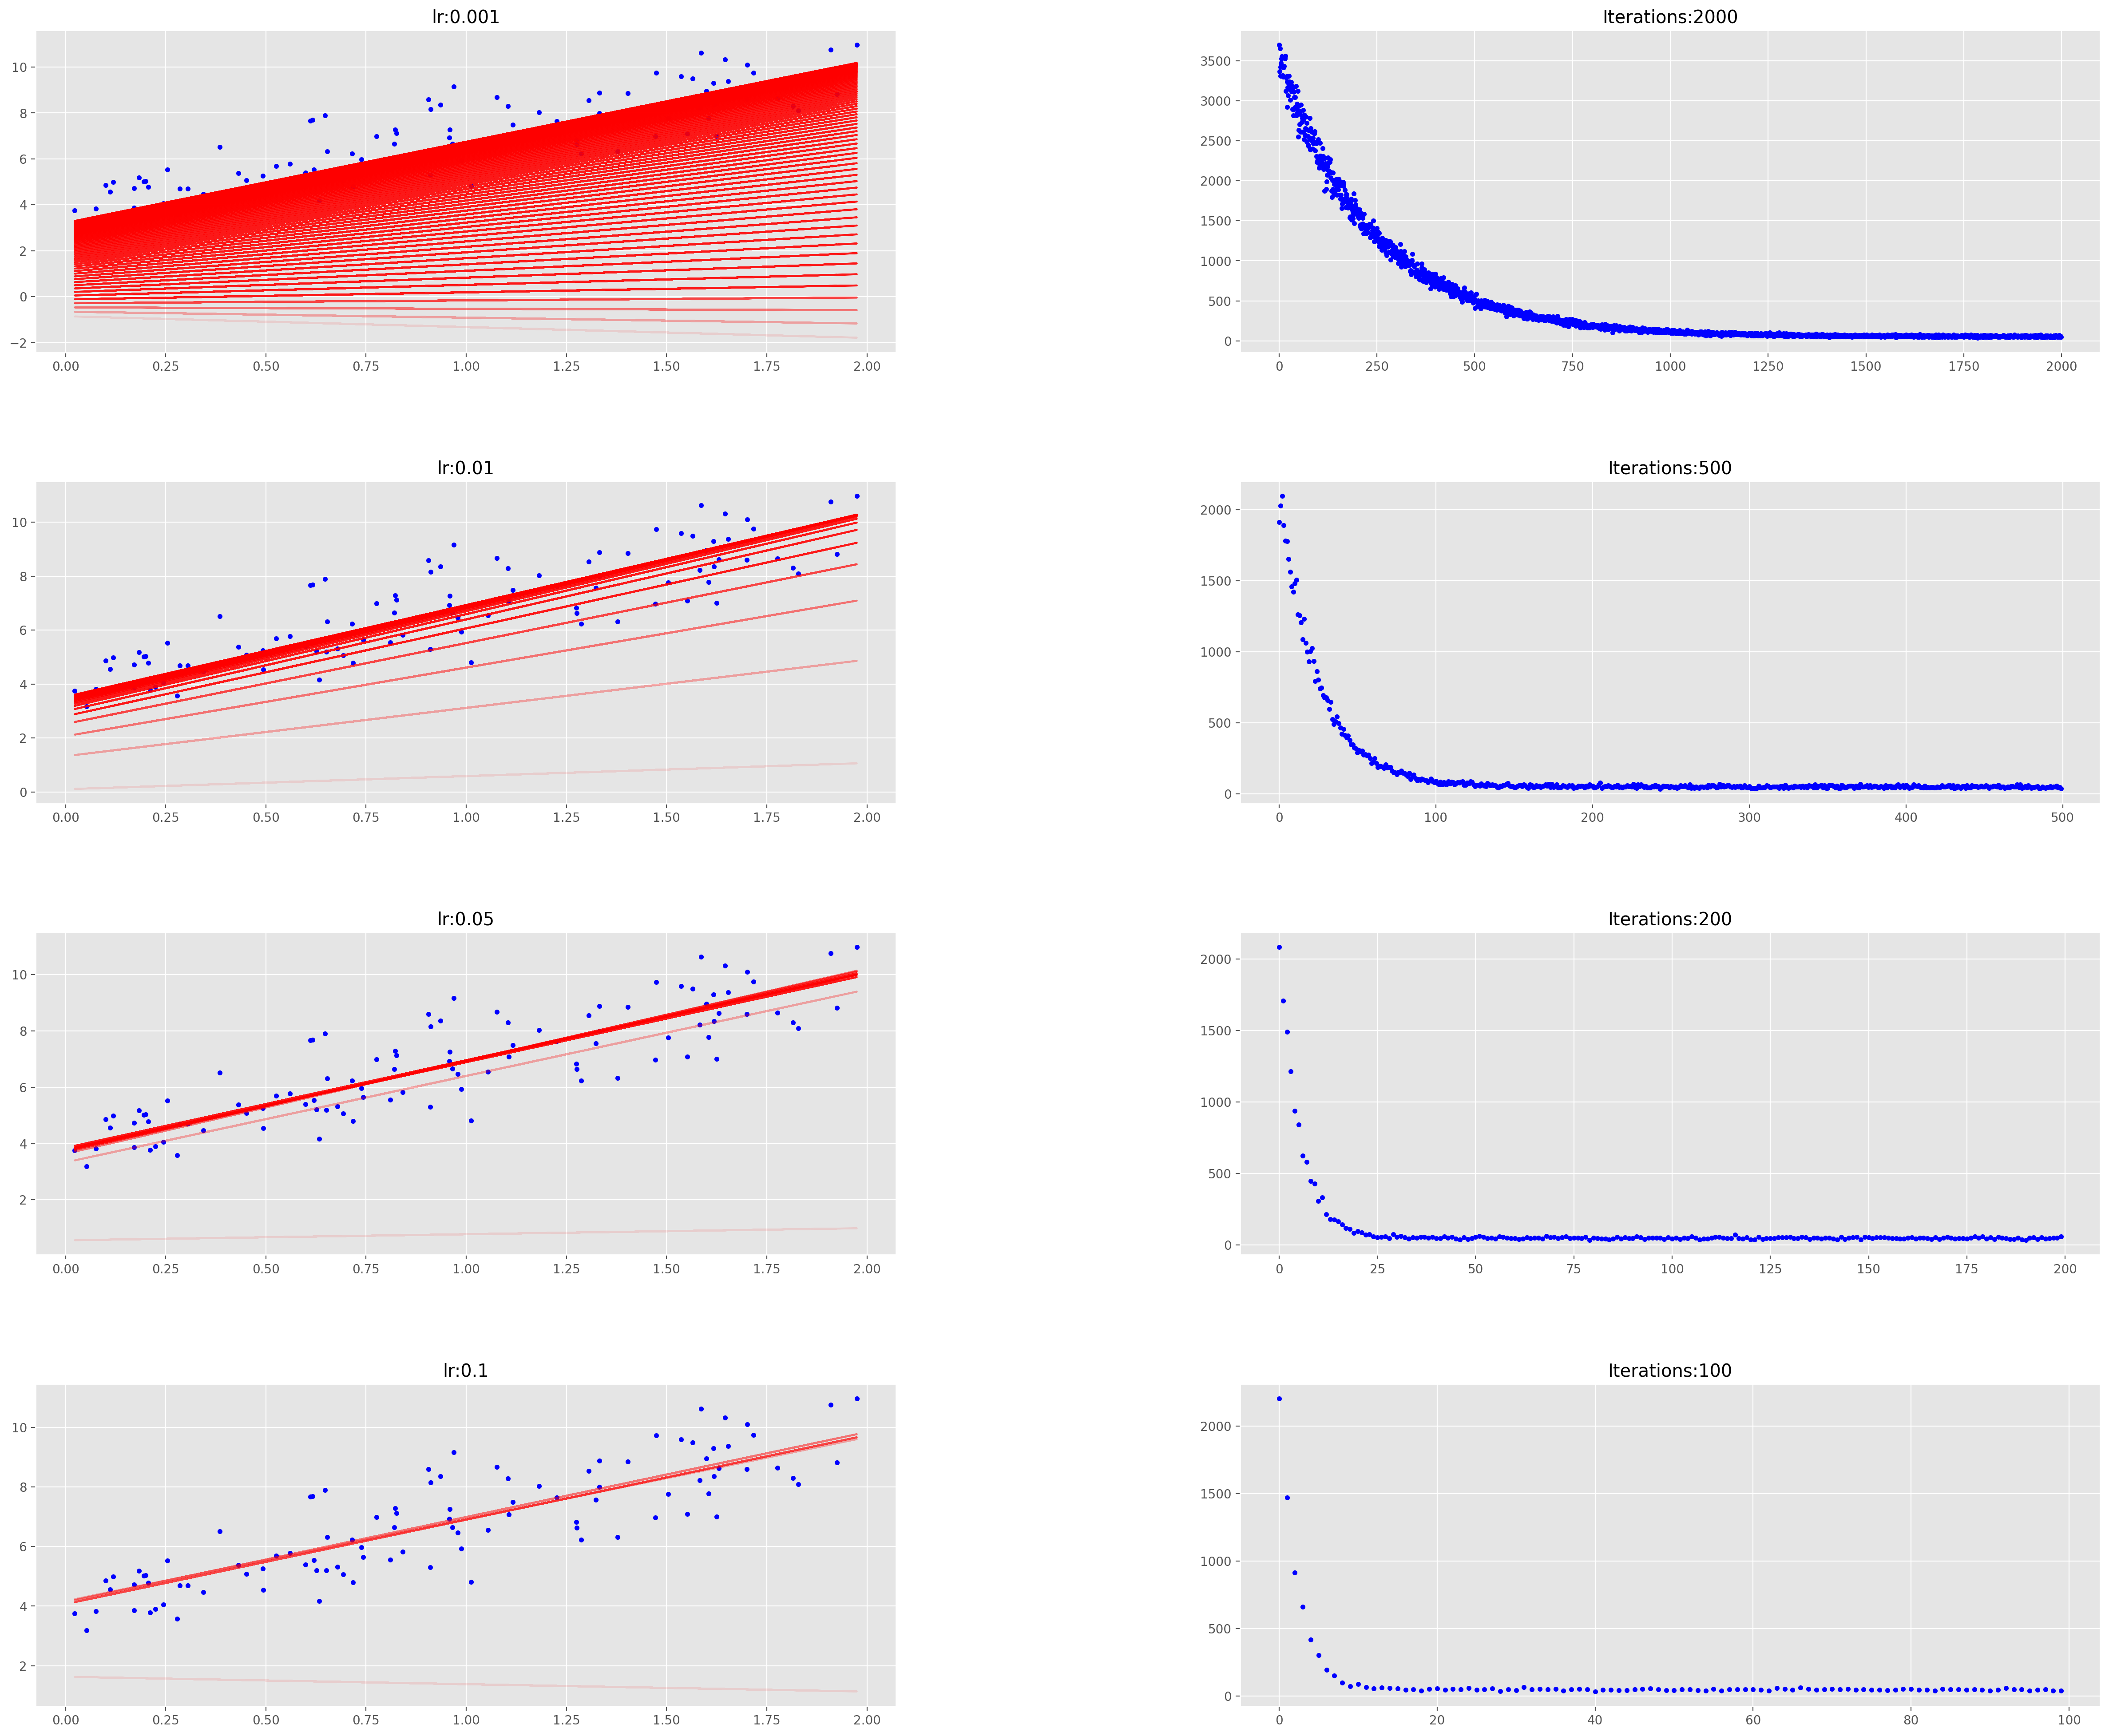

In [18]:
fig = plt.figure(figsize=(30,25),dpi = 200)
fig.subplots_adjust(hspace=0.4, wspace = 0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count = 0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter, lr, ax, ax1)

# Problem of SGD
### However, there is a significant drawback in SGD. If the gradient is too big(learning rate $\gamma$ too big), then it may not go to the optimal solution.

![Problem of big learning rate in SGD](https://miro.medium.com/max/560/1*ogL5WUU6dMyaJWLPBeq0Mg.gif "segment")

# Momentum
### Define a momentum, which is a moving average of our gradients. We then use it toupdate the weight of the network. This could be written as follows:

$V_t = \beta V_{t-1} + (1 - \beta) \nabla_w L(w, X, y)$

$W = w - \alpha V_t$

### where L is loss function, , triangular thing — gradient w.r.t weight and alpha — learning rate. The other way, which is most popular way to write momentum update rules, is less intuitive and just omits (1 - beta) term.

$V_t = \beta V_{t-1} + \alpha \nabla_w L(w, X, y)$

$W = w - V_t$

In [10]:
# SGC
def stocashtic_gradient_descent_with_momentum(X, y, theta, learning_rate = 0.01, decay_rate = 0.0, iterations = 10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    velocity = 0.0
    
    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind,:].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i,theta)

            velocity = velocity * decay_rate + (1 / m) * learning_rate * ( X_i.T.dot((prediction - y_i)))

            theta = theta - velocity
            cost += cal_cost(theta, X_i, y_i)

        cost_history[it]  = cost
        
    return theta, cost_history

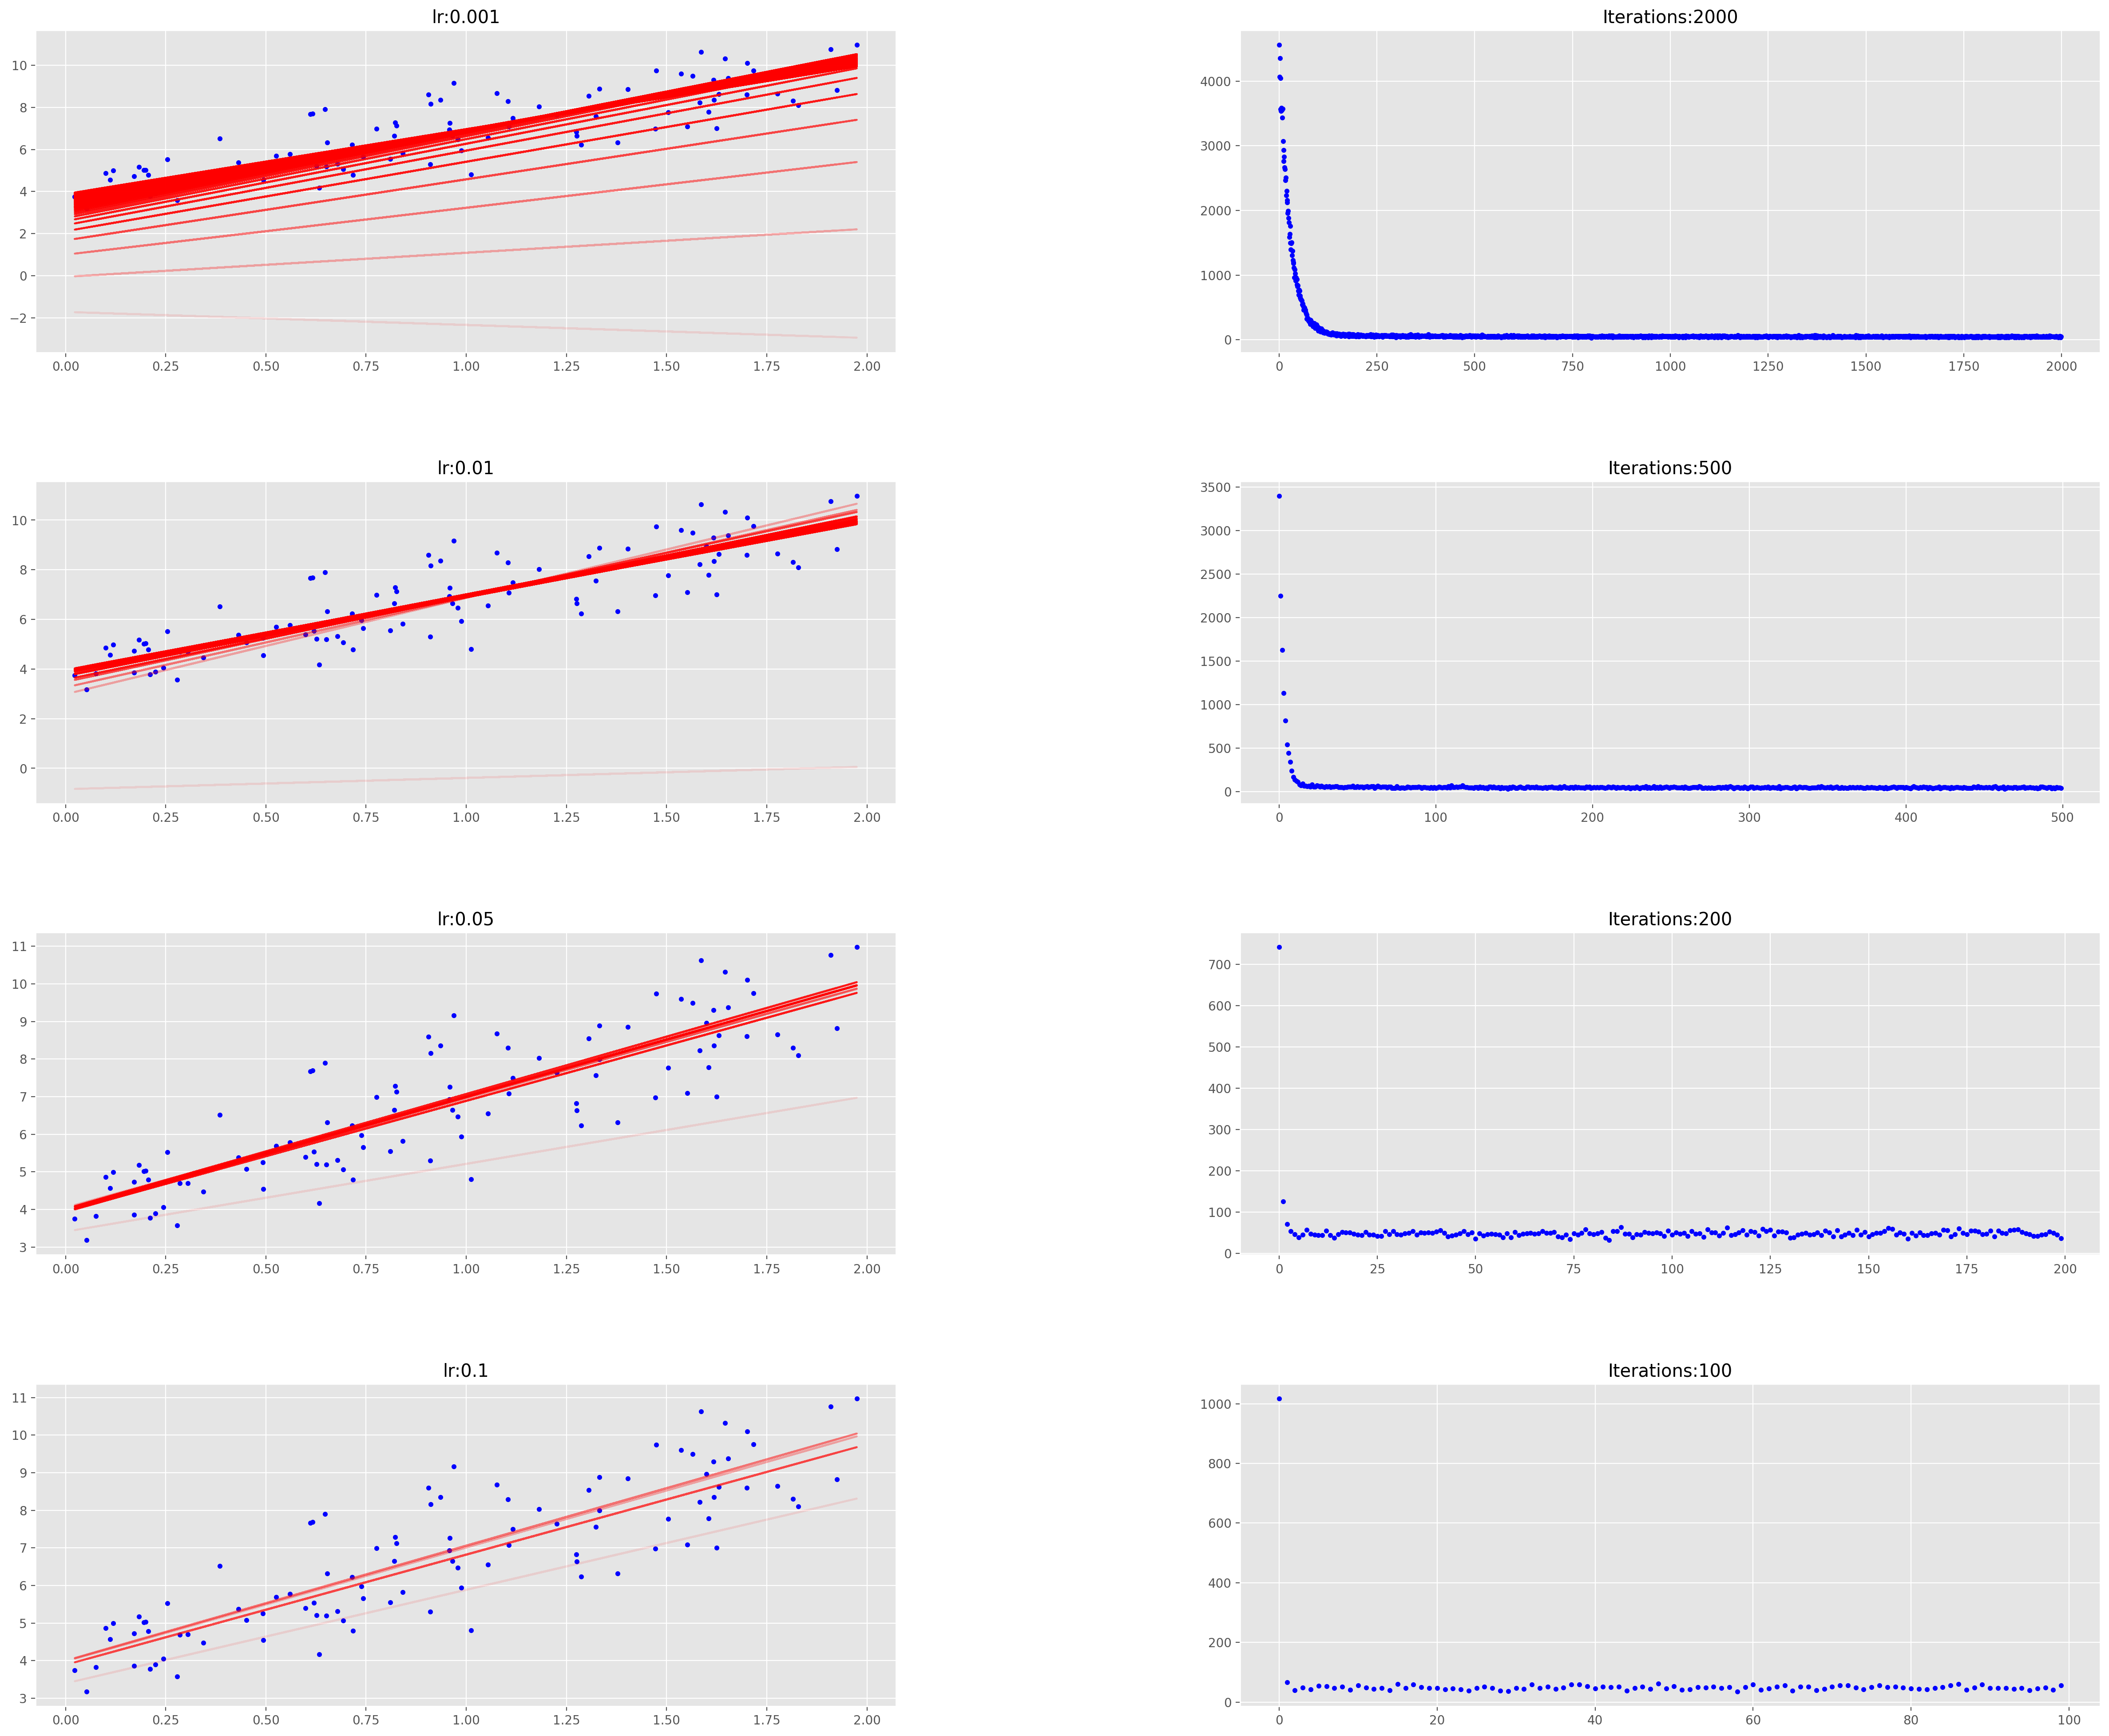

In [19]:
fig = plt.figure(figsize=(30,25),dpi = 200)
fig.subplots_adjust(hspace=0.4, wspace = 0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count = 0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter, lr, ax, ax1, True)